In [1]:
import pandas as pd # data frame library
import seaborn as sns # data visialization library
import matplotlib.pyplot as plt
import numpy
import os

In [2]:
os.getcwd()

'C:\\Users\\fkari653\\Downloads'

In [3]:
df = pd.read_csv('heart failure.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
df = df.rename({'DEATH_EVENT':'death'},axis=1)

In [7]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [8]:
#df.to_csv('new.csv') to save/download your current csv file in your device

In [9]:
df.death.value_counts()

0    203
1     96
Name: death, dtype: int64

<AxesSubplot:xlabel='count', ylabel='death'>

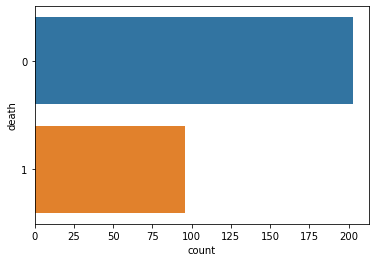

In [10]:
sns.countplot(y='death',data=df)

<AxesSubplot:xlabel='death', ylabel='count'>

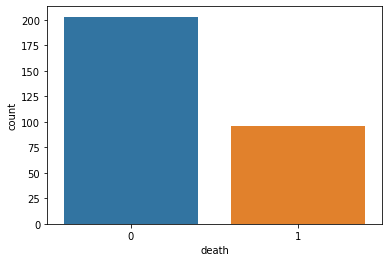

In [11]:
sns.countplot(x='death',data=df)

(<AxesSubplot:xlabel='diabetes', ylabel='count'>,)

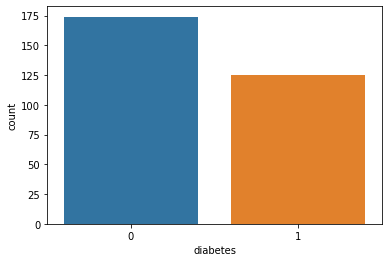

In [12]:
sns.countplot(x='diabetes', data=df) , #='death')

<AxesSubplot:xlabel='diabetes', ylabel='count'>

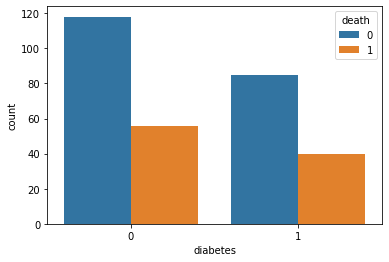

In [13]:
sns.countplot(x='diabetes', data=df, hue='death')

In [14]:
df.diabetes.value_counts()

0    174
1    125
Name: diabetes, dtype: int64

<AxesSubplot:xlabel='anaemia', ylabel='count'>

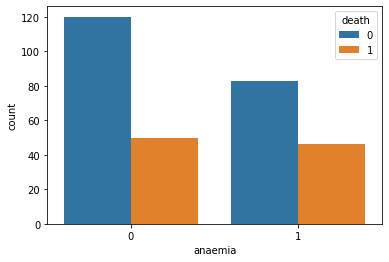

In [15]:
sns.countplot(x='anaemia', data=df, hue='death')

In [16]:
df.anaemia.value_counts()

0    170
1    129
Name: anaemia, dtype: int64

<AxesSubplot:xlabel='anaemia', ylabel='count'>

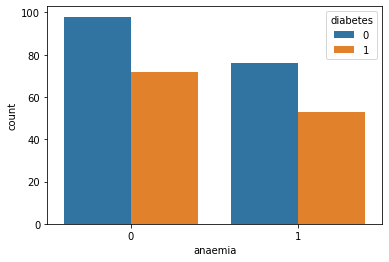

In [17]:
sns.countplot(x='anaemia', data=df, hue='diabetes')

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

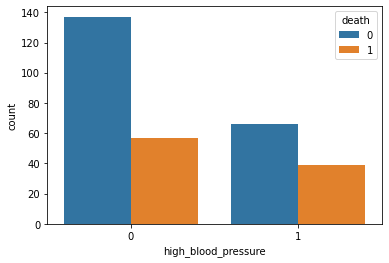

In [18]:
sns.countplot(x='high_blood_pressure', data=df, hue='death')

In [19]:
x = df.drop('death',axis=1)

In [20]:
y = df['death']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=.70,random_state=42)

In [23]:
ytest

281    0
265    0
164    1
9      1
77     0
      ..
132    0
72     1
15     1
10     1
157    0
Name: death, Length: 90, dtype: int64

In [24]:
ytest.shape

(90,)

In [25]:
xtest.shape

(90, 12)

# Apply Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dt = DecisionTreeClassifier()

In [28]:
dt.fit(xtrain,ytrain) #train the model with 70% of data from dataset

DecisionTreeClassifier()

In [29]:
pred = dt.predict(xtest) # pred is corrsponding to ytest
pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1], dtype=int64)

In [30]:
ytest

281    0
265    0
164    1
9      1
77     0
      ..
132    0
72     1
15     1
10     1
157    0
Name: death, Length: 90, dtype: int64

In [31]:
pred # Predicted value of Y

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1], dtype=int64)

In [32]:
import numpy as np
np.array(ytest) # Actual Value of Y

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0], dtype=int64)

# Evaluate the ML model

In [33]:
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix, plot_roc_curve

In [34]:
classification_report(ytest,pred) 

'              precision    recall  f1-score   support\n\n           0       0.69      0.77      0.73        53\n           1       0.61      0.51      0.56        37\n\n    accuracy                           0.67        90\n   macro avg       0.65      0.64      0.65        90\nweighted avg       0.66      0.67      0.66        90\n'

In [35]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73        53
           1       0.61      0.51      0.56        37

    accuracy                           0.67        90
   macro avg       0.65      0.64      0.65        90
weighted avg       0.66      0.67      0.66        90



In [36]:
test_confusion_matrix = confusion_matrix(ytest,pred)

In [37]:
test_confusion_matrix

array([[41, 12],
       [18, 19]], dtype=int64)

<AxesSubplot:>

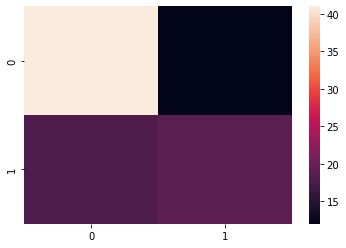

In [38]:
sns.heatmap(test_confusion_matrix)

<AxesSubplot:>

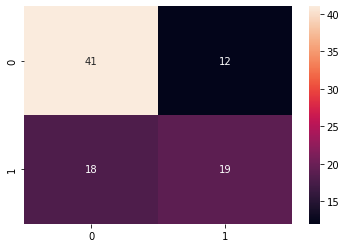

In [39]:
sns.heatmap(test_confusion_matrix, annot=True)# annot(the value of each true/false event)

In [40]:
tp, fn, fp, tn = confusion_matrix(ytest,pred).reshape(-1)

In [41]:
tp,fn,fp,tn

(41, 12, 18, 19)

In [42]:
accuracy = (tp+tn) / (tp+tn+fp+fn) # True event / Total event
accuracy

0.6666666666666666

# ROC Curve

In [43]:
import warnings
warnings.filterwarnings('ignore') ## To ignore Warnings

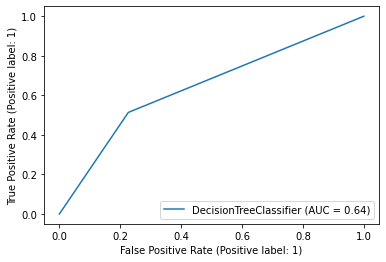

In [44]:
plot_roc_curve(dt, xtest, ytest)

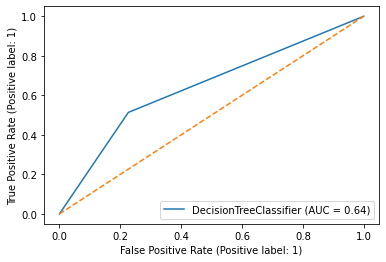

In [45]:
plot_roc_curve(dt, xtest, ytest)
plt.plot([0,1],[0,1],linestyle='dashed')

In [46]:
#PPV

Precision = tp / ( tp + fp )
Precision

0.6949152542372882

# Random forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
ran=RandomForestClassifier()

In [48]:
ran.fit(xtrain,ytrain)

RandomForestClassifier()

In [49]:
ran.score(xtest,ytest)

0.7555555555555555

In [50]:
pred = ran.predict(xtest)
pred

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0], dtype=int64)

In [51]:
ytest

281    0
265    0
164    1
9      1
77     0
      ..
132    0
72     1
15     1
10     1
157    0
Name: death, Length: 90, dtype: int64

In [52]:
classification_report(ytest,pred) 

'              precision    recall  f1-score   support\n\n           0       0.75      0.87      0.81        53\n           1       0.76      0.59      0.67        37\n\n    accuracy                           0.76        90\n   macro avg       0.76      0.73      0.74        90\nweighted avg       0.76      0.76      0.75        90\n'

In [53]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81        53
           1       0.76      0.59      0.67        37

    accuracy                           0.76        90
   macro avg       0.76      0.73      0.74        90
weighted avg       0.76      0.76      0.75        90



In [54]:
test_confusion_matrix = confusion_matrix(ytest,pred)

In [55]:
test_confusion_matrix

array([[46,  7],
       [15, 22]], dtype=int64)

<AxesSubplot:>

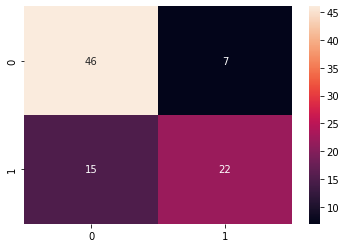

In [56]:
sns.heatmap(test_confusion_matrix, annot=True)

In [57]:
tp, fn, fp, tn = confusion_matrix(ytest,pred).reshape(-1)

In [58]:
tp,tn,fp,fn

(46, 22, 15, 7)

In [59]:
accuracy = (tp+tn) / (tp+tn+fp+fn) # True event / Total event
accuracy

0.7555555555555555

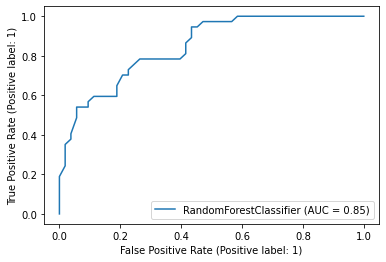

In [60]:
plot_roc_curve(ran, xtest, ytest)

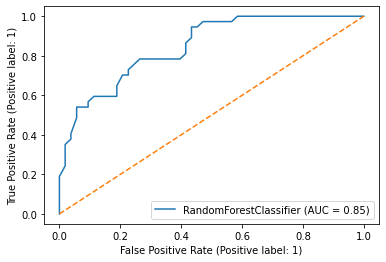

In [61]:
plot_roc_curve(ran, xtest, ytest)
plt.plot([0,1],[0,1],linestyle='dashed')

# Optimizing Algorithm

In [62]:
 ###  Hyper Parameter tuning

# ##Randomize Search Cv

In [63]:
from sklearn.model_selection import RandomizedSearchCV #CV(cross validation)

In [64]:
#np.random.randint(10,200,10)

In [65]:
n_estimators=[int(x) for x in np.linspace(start=10,stop=300,num=10)]

In [66]:
n_estimators

[10, 42, 74, 106, 138, 171, 203, 235, 267, 300]

In [67]:
df.shape

(299, 13)

In [68]:
max_features=['Auto','sqrt','log2']
max_depth=(2,3,4,5,6,7,8,9,10,12,15,20)
min_sample_split=(2,3,4,5,6,7,8,9,10,12,15)
min_sample_leaf=(2,3,4,5,6,7,8,9,10,12)
criterion=['gini','entropy']

grids={    
      'n_estimators': n_estimators,
     'max_features': max_features,
     'max_depth':max_depth,
    'min_samples_split': min_sample_split,
   'min_samples_leaf': min_sample_leaf,
   'criterion':criterion
}
    
    
    
  


In [69]:
grids

{'n_estimators': [10, 42, 74, 106, 138, 171, 203, 235, 267, 300],
 'max_features': ['Auto', 'sqrt', 'log2'],
 'max_depth': (2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20),
 'min_samples_split': (2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15),
 'min_samples_leaf': (2, 3, 4, 5, 6, 7, 8, 9, 10, 12),
 'criterion': ['gini', 'entropy']}

In [70]:
##RandomizedSearch Cv
rmscv= RandomizedSearchCV(ran,grids,n_iter=250,cv=3)

In [71]:
rmscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=250,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': (2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 12, 15, 20),
                                        'max_features': ['Auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': (2, 3, 4, 5, 6, 7,
                                                             8, 9, 10, 12),
                                        'min_samples_split': (2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 12,
                                                              15),
                                        'n_estimators': [10, 42, 74, 106, 138,
                                                         171, 203, 235, 267,
                               

In [72]:
rmscv.cv_results_

{'mean_fit_time': array([0.04760941, 0.24839687, 0.11508234, 0.11183198, 0.20850937,
        0.11290876, 0.1833357 , 0.22513199, 0.73750885, 0.8817126 ,
        0.06857777, 0.26264946, 0.77195279, 0.09267688, 0.10706925,
        0.08893069, 0.05434863, 0.67143035, 0.74732073, 0.01300899,
        0.12380711, 0.33872008, 0.27468602, 0.09793369, 0.04725901,
        0.14445305, 0.7132589 , 0.03130269, 0.5258073 , 0.17521604,
        0.01256736, 0.21483095, 0.05531748, 0.18830355, 0.13052328,
        0.50988189, 0.02504667, 0.10495075, 0.47763387, 0.06833903,
        0.06994104, 0.71653644, 0.127774  , 0.01065445, 0.03358094,
        0.1701622 , 0.56083798, 0.02900902, 0.05597115, 0.03067239,
        0.10336932, 0.42588862, 0.79827944, 0.0829521 , 0.1918966 ,
        0.13841796, 0.7449619 , 0.06850004, 0.75875171, 0.20658   ,
        0.3233103 , 0.6086812 , 0.18047945, 0.77464358, 0.0977118 ,
        0.17231941, 0.259468  , 0.03114923, 0.63282688, 0.59606457,
        0.27853235, 0.34783149,

In [73]:
results=pd.DataFrame(rmscv.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.047609,0.001062,0.010651,0.002045,10,7,9,log2,3,gini,"{'n_estimators': 10, 'min_samples_split': 7, '...",0.800000,0.857143,0.884058,0.847067,0.035048,125
1,0.248397,0.048800,0.016649,0.000739,74,4,2,log2,7,entropy,"{'n_estimators': 74, 'min_samples_split': 4, '...",0.814286,0.928571,0.855072,0.865977,0.047290,84
2,0.115082,0.005679,0.010429,0.001753,42,3,3,sqrt,3,gini,"{'n_estimators': 42, 'min_samples_split': 3, '...",0.814286,0.914286,0.797101,0.841891,0.051669,134
3,0.111832,0.009515,0.013954,0.002360,42,8,9,log2,9,entropy,"{'n_estimators': 42, 'min_samples_split': 8, '...",0.828571,0.914286,0.840580,0.861146,0.037894,100
4,0.208509,0.010143,0.019247,0.003543,74,7,6,log2,3,entropy,"{'n_estimators': 74, 'min_samples_split': 7, '...",0.842857,0.942857,0.797101,0.860939,0.060863,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.170065,0.002952,0.000000,0.000000,267,15,3,Auto,20,gini,"{'n_estimators': 267, 'min_samples_split': 15,...",NaN,NaN,NaN,NaN,NaN,183
246,0.629133,0.010038,0.052119,0.000052,267,7,9,sqrt,3,entropy,"{'n_estimators': 267, 'min_samples_split': 7, ...",0.814286,0.957143,0.826087,0.865839,0.064741,92
247,0.165845,0.003702,0.000000,0.000000,267,8,4,Auto,4,gini,"{'n_estimators': 267, 'min_samples_split': 8, ...",NaN,NaN,NaN,NaN,NaN,181
248,0.100536,0.003255,0.011501,0.003072,42,12,5,sqrt,20,entropy,"{'n_estimators': 42, 'min_samples_split': 12, ...",0.871429,0.928571,0.869565,0.889855,0.027387,4


In [74]:
rmscv.best_score_

0.8946859903381643

In [75]:
rmscv.best_params_

{'n_estimators': 106,
 'min_samples_split': 3,
 'min_samples_leaf': 6,
 'max_features': 'log2',
 'max_depth': 5,
 'criterion': 'gini'}

In [76]:
ran1=rmscv.best_estimator_
ran1

RandomForestClassifier(max_depth=5, max_features='log2', min_samples_leaf=6,
                       min_samples_split=3, n_estimators=106)

In [77]:
ran1.score(xtest,ytest)

0.7777777777777778

In [78]:
ran.score(xtest,ytest)

0.7555555555555555

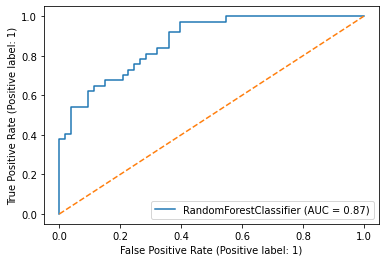

In [79]:
plot_roc_curve(ran1, xtest, ytest)
plt.plot([0,1],[0,1],linestyle='dashed')